<a href="https://colab.research.google.com/github/jrl309/Financial-Modeling-Course/blob/main/Assignment_3_(MSFO_833_Spring_2023)_%5Bsp1463_PIERONI%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> NOTE: all challenges in this assignment are adapted from material created by Prof. Ram Yamarthy (2021).

# New Section

# Instructions

1. **Make a copy of this notebook** so you can edit and save your own version of it. Optionally update the notebook title to include your Group Number and/or the Net IDs of all group members. Do the work in your copy of the notebook. 

2. Edit the sharing settings: **share your notebook** publicly, so **"Anyone with the link can view"**. Notebooks not shared properly may be subject to late deductions if an instructor is unable to access them at the time of grading.

3. **Run the Setup Cells** in the "Setup" section.

4. **Complete the challenges**. For each challenge:
    + **Run any additional provided "Setup" cell(s)**, as necessary.
    + **Write Python code** to answer each of the provided questions. 






# Submission Instructions



To review your notebook / ensure it works as expected / prepare for evaluation: 
  1. Run it from scratch ("Runtime" > "Restart and run all"), provide any necessary user inputs, and verify you see the results you expect.


When you're done coding and your notebook reflects your final work product, follow BOTH these steps to submit:

  1. Download a copy of your notebook document in .ipynb format ("File" > "Download" > "Download .ipynb"). Then **upload the resulting .ipynb notebook file to Canvas**.
  2. Ensure your notebook sharing settings are open so "anyone with the link can view", then **submit your Colab Notebook URL via the [Submission Form](https://forms.gle/gWHLVjN2XVmqCogm7)**. 


> NOTE: only one member needs to submit on behalf of the group.

Thank you!

# Evaluation

Deliverables will be evaluated based on the criteria below:

Category | Weight | Description
--- | --- | ---
Challenge 1 | 50% | 
Challenge 2 | 40% | 
Chart Quality and Formatting | 10% | All charts should have a title, and axis labels. 

This rubric is tentative, and may be subject to adjustments during the grading process.

# Setup

## Imports

In [1]:

# RUN THIS CELL AND FEEL FREE TO MODIFY / UPDATE AS DESIRED

import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

import plotly.express as px
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA

## Ignore Warnings

In [2]:
# https://stackoverflow.com/a/9031848/670433
import warnings

warnings.filterwarnings('ignore')

## Correlation Example

In [3]:
# feel free to reference this example  
# ... and adapt / replicate the correlation calculations 
# ... when you get to Challenge 2 Question B

# this is just an example dataframe, 
# where column a and b are closely correlated,
# and also including a NaN val in each column (to help us practice computing correlation even with null values)
example_df = pd.DataFrame({
    "col_a": [1,2,3,4,5,6, None],
    "col_b": [101,198,305,402,497,595, None],
    "col_c": [9, 4, 2, 100, 88, 44, None]
})
example_df

,col_a,col_b,col_c
0,1.0,101.0,9.0
1,2.0,198.0,4.0
2,3.0,305.0,2.0
3,4.0,402.0,100.0
4,5.0,497.0,88.0
5,6.0,595.0,44.0
6,NaN,NaN,NaN


In [4]:
# option a) pair-wise correlation matrix using DataFrame corr() method

example_df.corr()

,col_a,col_b,col_c
col_a,1.000000,0.999858,0.640007
col_b,0.999858,1.000000,0.641870
col_c,0.640007,0.641870,1.000000


In [5]:
# option b) use scipy 
# ... either the spearman or the pearson methodology would be fine for this assignment
# ... https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# ... https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

from scipy.stats import spearmanr, pearsonr

print("---------------------")
print("SPEARMAN CORRELATION...")
corr_results = spearmanr(example_df["col_a"], example_df["col_b"], nan_policy="omit")
print(corr_results)

print("---------------------")
print("PEARSON CORRELATION...") 
example_df.dropna(inplace=True) # for pearson we need to drop NaNs beforehand
corr_results = pearsonr(example_df["col_a"], example_df["col_b"])
print(corr_results) #> (correlation, pvalue)

---------------------
SPEARMAN CORRELATION...
SpearmanrResult(correlation=1.0, pvalue=0.0)
---------------------
PEARSON CORRELATION...
(0.999857633165385, 3.0401030629471845e-08)


# Challenges

> NOTE: all challenges adapted from material created by Prof. Ram Yamarthy (2021).

## 1) Consumer Spending Over Time 



Here we examine trends that exist in real, quarterly U.S. consumer spending. We'll work with the dataset called "ConsumerSpending.xlsx" which comes from the U.S. Bureau of Economic Analysis.

(a) Load the data. What columns do you see in the dataset? If necessary, convert the `"Date"` column to a pandas datetime object, using `pd.to datetime()`. Then also add a column called `"Quarter"` indicating which quarter the data pertains to. 

> HINT: for a dataframe called `df` with a `"Date"` column that is a pandas datetime object, try `df["Date"].dt.quarter`



(b) Plot the time series of total retail sales, with `"Date"` on the x-axis and `"RealPCE"` on the y-axis. What do you see? From a basic visual inspection, is there a clear trend and / or seasonality?

(c) Given the evidence for a trend, estimate a linear regression using the `statsmodels` package. Display the regression results (i.e. use the summary function).

(d) Plot the true `"RealPCE"` values against the fitted / predicted values from the regression. 

(e) Also plot the residuals obtained from the regression results. 

(f) Using the residuals obtained from the regression results, show evidence that there are quarterly, seasonal effects.

> HINT: use the `groupby()` method

(g) Show evidence that consumer spending has become more seasonal after 1990, relative to the pre-1990 period. One way to do this is to compute quarterly effects in the pre- and post- 1990 periods, and compare their relative volatilities across quarters.

> HINT: use row filtering approaches to arrive at two different subsets of the data, and perform the analysis on each subset

**OPTIONAL FURTHER EXPLORATION:**

(h) Optionally repeat parts (d) through (g), but this time using values predicted by a non-parametric trend line smoothing function such as the `lowess`.



### A) LOAD AND CLEAN DATA

In [6]:
# LOAD THE DATA

file_name = "ConsumerSpending.xlsx"
spending_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
spending_df.head()

,Date,NominalPCE,PCEDeflator,RealPCE
0,1947-03-31,36748,12.225,300597.137014
1,1947-06-30,39831,12.322,323251.095601
2,1947-09-30,39991,12.552,318602.613129
3,1947-12-31,45282,12.865,351978.235523
4,1948-03-31,40579,13.007,311978.165603


In [7]:
spending_df.dtypes

Date           datetime64[ns]
NominalPCE              int64
PCEDeflator           float64
RealPCE               float64
dtype: object

In [8]:
spending_df['Quarter'] = spending_df['Date'].dt.quarter
spending_df.head()

,Date,NominalPCE,PCEDeflator,RealPCE,Quarter
0,1947-03-31,36748,12.225,300597.137014,1
1,1947-06-30,39831,12.322,323251.095601,2
2,1947-09-30,39991,12.552,318602.613129,3
3,1947-12-31,45282,12.865,351978.235523,4
4,1948-03-31,40579,13.007,311978.165603,1


### B) VISUALIZATION OF TRENDS

In [9]:
px.scatter(spending_df, x="Date", y="RealPCE", 
              trendline="ols", trendline_color_override="red",
              title="Consumer Spending w/ Trend Line (OLS)"
)

Yes, we can clearly see the trend of consumer spending increase as the time passes.

In [10]:
px.scatter(spending_df, x="Date", y="RealPCE", 
        trendline="lowess", trendline_color_override="red",
        title="Consumer Spending w/ Trend Line (Lowess)"
)

### C) LINEAR REGRESSION (OLS)

In [11]:
y = spending_df['RealPCE']

time_range = range(1, len(spending_df) + 1) 
x = sm.add_constant(time_range)
x = pd.DataFrame(x, columns=["const", "time"], index=y.index)

linear_regression = sm.OLS(y, x, missing="drop")
print(type(linear_regression))

results = linear_regression.fit()
print(type(results))

print(results.summary())

<class 'statsmodels.regression.linear_model.OLS'>
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
                            OLS Regression Results                            
Dep. Variable:                RealPCE   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     6190.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          6.22e-201
Time:                        17:35:31   Log-Likelihood:                -4073.1
No. Observations:                 299   AIC:                             8150.
Df Residuals:                     297   BIC:                             8158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

### D) PLOT PREDICTIONS





In [12]:
spending_df["Linear_Regression_Pred"] = results.fittedvalues
px.line(spending_df, x="Date", y=["RealPCE", "Linear_Regression_Pred"], title="Real Consumer Spending vs Linear Regression Prediction ")

### E) PLOT RESIDUALS





In [13]:
spending_df["Linear_Regression_Resid"] = results.resid
px.line(spending_df, x="Date", y="Linear_Regression_Resid", title="Real Consumer Spending vs trend residuals (Statsmodels OLS)")


In [14]:
spending_df["Linear_Regression_Resid_Check"] = spending_df["RealPCE"] - spending_df["Linear_Regression_Pred"]
px.line(spending_df, x="Date", y="Linear_Regression_Resid_Check", title="Real Consumer Spending vs trend residuals (Statsmodels OLS)")

### F) SEASONALITY

In [15]:
print(spending_df.groupby("Quarter")["Linear_Regression_Resid"].mean())

Quarter
1   -40151.098577
2    -3034.653412
3    -3965.575566
4    47788.507657
Name: Linear_Regression_Resid, dtype: float64


### G) INCREASE IN SEASONALITY

In [16]:
import datetime as dt

spending_pre1990_df = spending_df[spending_df['Date'] < dt.datetime(1990, 1, 1)]
spending_post1990_df = spending_df[spending_df['Date'] >= dt.datetime(1990, 1, 1)]

In [17]:
print('Pre-1990 seasonality:')
print(spending_pre1990_df.groupby("Quarter")["Linear_Regression_Resid"].mean())
print('\nPost-1990 seasonality:')
print(spending_post1990_df.groupby("Quarter")["Linear_Regression_Resid"].mean())

Pre-1990 seasonality:
Quarter
1   -56003.442230
2   -32688.545601
3   -40911.496801
4    -1558.942164
Name: Linear_Regression_Resid, dtype: float64

Post-1990 seasonality:
Quarter
1    -18849.511793
2     36812.764218
3     45680.506094
4    116238.196117
Name: Linear_Regression_Resid, dtype: float64


### H) LOWESS TREND (OPTIONAL)

In [18]:
from statsmodels.nonparametric.smoothers_lowess import lowess

y = spending_df["RealPCE"]

x = range(1, len(spending_df)+1)

lowess_results = lowess(exog=x, endog=y)
print(type(lowess_results), lowess_results.shape) #> np.array with two cols, x and y_pred

lowess_y_pred = lowess_results[:, 1] # use just the second column, of preds

<class 'numpy.ndarray'> (299, 2)


In [19]:
spending_df["Lowess_Pred"] = lowess_y_pred
spending_df["Lowess_Resid"] = spending_df["RealPCE"] - spending_df["Lowess_Pred"]

Plot Predictions / Trend

In [20]:
px.line(spending_df, x="Date", y=["RealPCE", "Lowess_Pred"], title="Real Consumer Spending vs Lowess Prediction ")

Plot Residuals

In [21]:
px.line(spending_df, x="Date", y=["RealPCE", "Lowess_Resid"], title="Real Consumer Spending vs Lowess Residuals ")

Seasonality

In [22]:
print(spending_df.groupby("Quarter")["Lowess_Resid"].mean())

Quarter
1   -63989.638835
2   -26800.007251
3   -27682.959391
4    28053.196238
Name: Lowess_Resid, dtype: float64


Pre vs Post 1990

In [23]:
lowess_pre1990_df = spending_df[spending_df['Date'] < dt.datetime(1990, 1, 1)]
lowess_post1990_df = spending_df[spending_df['Date'] >= dt.datetime(1990, 1, 1)]

In [24]:
print('Pre-1990 seasonality:')
print(lowess_pre1990_df.groupby("Quarter")["Lowess_Resid"].mean())
print('\nPost-1990 seasonality:')
print(lowess_post1990_df.groupby("Quarter")["Lowess_Resid"].mean())

Pre-1990 seasonality:
Quarter
1   -54273.733934
2   -28084.476957
3   -33467.880196
4     8689.069081
Name: Lowess_Resid, dtype: float64

Post-1990 seasonality:
Quarter
1   -77045.386046
2   -25074.001083
3   -19909.472060
4    54913.114552
Name: Lowess_Resid, dtype: float64


## 2) Persistence of Oil Volatility



In this exercise, we focus on movements of crude oil prices, by analyzing the monthly volatility of returns in spot West Texas Intermediate (WTI) prices. All data are originally sourced from the US Energy Information Administration (EIA).

(a) Load the dataset given in "CrudePrices_Monthly.xlsx". 

> NOTE: The `"Vol"` column provides the intra-month volatility of oil returns, while the `"LastSpot"` column indicates the last price of WTI for that month. And the `"Ret"` column is the monthly return if one was to hold on to a barrel of oil over the course of the month.

(b) What is the correlation betweeen intra-month volatility and monthly oil returns?

> HINT: use any one of the correlation methods demonstrated in the setup section


(c) Plot the autocorrelation function (ACF) of crude oil volatility. On average, how correlated is this month’s return volatility with next month’s?

(d) As oil volatility seems to be fairly persistent, we will estimate an autoregressive model to better determine the fit. Fit an autoregressive model with three lags (AR(3)) and display the output of the regression. Which volatility term (i.e. lag period) is most significant in predicting current volatilty?

(e) Use the trained ARMA model to predict volatility for the time period from `"2016-01-31"` to `"2019-12-31"`. Then plot these predictions vs the actual volatility values.


(f) One issue that commonly arises is that while a model can do a good job forecasting the data it is fitted to (in this case 1986 – 2019), it might have difficulty forecasting new data in the future (2020 and beyond). How might one test whether the model does a good job with out-of-sample (i.e. unseen) data? Answer this question in words. 

### A) LOAD AND CLEAN DATA

In [25]:
# LOAD THE DATA

file_name = "CrudePrices_Monthly.xlsx"
oil_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
oil_df.head()

,Date,Year,Month,Vol,LastSpot,Ret
0,1986-01-31,1986,1,0.161230,18.95,NaN
1,1986-02-28,1986,2,0.240258,13.23,-0.301847
2,1986-03-31,1986,3,0.310706,10.25,-0.225246
3,1986-04-30,1986,4,0.268445,13.38,0.305366
4,1986-05-31,1986,5,0.194400,14.30,0.068759


In [26]:
oil_df.index = oil_df["Date"] #setting the index for the ARMA predictions in point e)

### B) CORRELATION

In [27]:
corr_value = format(oil_df['Vol'].corr(oil_df['Ret']), '.2f')
print('The correlation between the monthly volatility and return is: \n', corr_value)

The correlation between the monthly volatility and return is: 
 -0.17


### C) ACF PLOT

In [28]:
n_lags = 10

acf_results = acf(oil_df['Vol'], nlags=n_lags, fft=True, missing="drop")

print("Autocorrelation for Oil Volatility with ", n_lags, "LAGS")
print(acf_results)

fig = px.line(y=acf_results, markers=["o"], height=300,        
            title=f"Auto-correlation of Monthly Oil Volatility ({'Vol'})",
            labels={"x": "Number of Lags", "y":"Auto-correlation"},   
    )
fig.show()

Autocorrelation for Oil Volatility with  10 LAGS
[ 1.          0.60340152  0.51941605  0.46088185  0.29145938  0.2943004
  0.19256418  0.1293768   0.05080978  0.04345617 -0.02724842]


### D) ARMA MODEL (LAG=3)

In [32]:
y = oil_df["Vol"]

auto_regression = ARIMA(y, order=(3, 0, 0), missing="drop")
print(type(auto_regression))

arma_results = auto_regression.fit()
print(type(arma_results))

print(arma_results.summary())

<class 'statsmodels.tsa.arima.model.ARIMA'>
<class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>
                               SARIMAX Results                                
Dep. Variable:                    Vol   No. Observations:                  408
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 729.746
Date:                Sat, 21 Jan 2023   AIC                          -1449.492
Time:                        17:52:01   BIC                          -1429.436
Sample:                    01-31-1986   HQIC                         -1441.556
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1031      0.011      9.438      0.000       0.082       0.125
ar.L1          0.4143      0.

All the three periods, lags, are statistically significant to predict current volatility. In fact, all the relative p-values are zero.

### E) ARMA PREDICTIONS

In [30]:
y_pred = arma_results.predict(start="2016-01-31", end="2019-12-31")

In [31]:
px.line(oil_df, x="Date", y="Vol", title="Monthly Oil Volatility (WTI)")

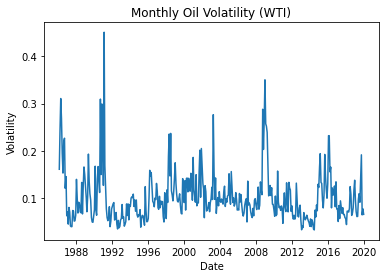

In [33]:
plt.plot(oil_df['Vol'])
plt.title('Monthly Oil Volatility (WTI)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

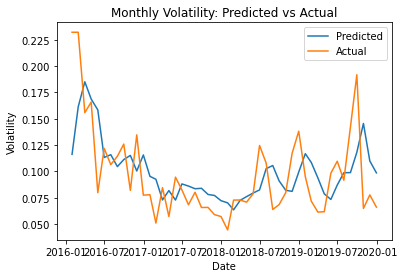

In [50]:
start_date = dt.datetime(2016,1,31)
end_date = dt.datetime(2019,12,31)

reduced_dates_df = oil_df[oil_df['Date'].dt.date.between(start_date.date(),end_date.date())]

plt.plot(y_pred)
plt.plot(reduced_dates_df['Vol'])
plt.title('Monthly Volatility: Predicted vs Actual')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(['Predicted', 'Actual'])
plt.show()

### F) OUT OF SAMPLE / UNSEEN

**Answer**: 

To test whether a model suffers of 'overfitting', the problem of a model that is too good with the provided set of data but has poor results when a new dataset comes in, we need break the dataset in two partitions. The training partition is used to build the model, then we use the test partition to assess the fitness of the model with new data. 
...



